<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [5]:
# ANSWER
titanic = pd.read_csv(r'C:\Users\Sanjeshni\Desktop\doc\DATA\titanic_train.csv', index_col='PassengerId')



In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [7]:
# ANSWER
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
titanic.shape

(891, 11)

In [9]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [15]:
# ANSWER
# set the features as X and y variables first 
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic[['Survived']].values.reshape(-1,1)         


#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [16]:
X.head()

,Pclass,Parch
PassengerId,,
1,3,0
2,1,0
3,3,0
4,1,0
5,3,0


In [17]:
# ANSWER

# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [18]:
# ANSWER
# Create Model

logreg  = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [19]:
# ANSWER
# Fit Model

logreg.fit(X_train, y_train)

C:\Users\Sanjeshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [20]:
# ANSWER
logreg.coef_

array([[-0.87239066,  0.337888  ]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [21]:
# ANSWER
logreg.intercept_

array([1.30430282])

We can create tuples of the predictor names and coefficients like this:

In [22]:
# ANSWER
print(set(zip(feature_cols, logreg.coef_[0])))

{('Pclass', -0.8723906606017789), ('Parch', 0.3378880048779747)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [23]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872391
Parch       +0.337888


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [24]:
# ANSWER
print('accuracy = {:7.4f}'.format(logreg.score(X_train,y_train)))

accuracy =  0.6901


What is the  `accuracy_score` for the test data?

In [25]:
# ANSWER
print('accuracy = {:7.4f}'.format(logreg.score(X_test,y_test)))

accuracy =  0.6682


What can we say about this result?

ANSWER
- ...Train score is more than test score. 
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [26]:
# ANSWER
titanic['Age'].fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
y = titanic[['Survived']].values.reshape(-1,1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
logreg_1 = LogisticRegression()
logreg_1.fit(X_train, y_train)
logreg_score = logreg_1.score(X_train, y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.7171


C:\Users\Sanjeshni\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
logreg_1.score(X_test, y_test)

0.672645739910314

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- train score is more than test score
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [30]:
# ANSWER
y_pred_class = logreg_1.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[107  21]
 [ 52  43]]


Nb. Here is how `confusion_matrix` arranges its output:

In [315]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ...false negative

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

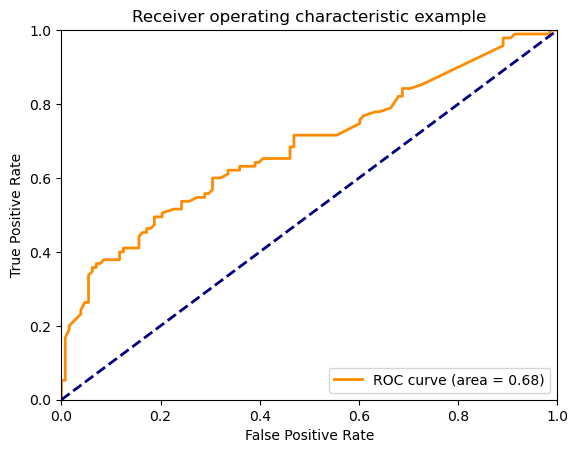

In [31]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg_1.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [32]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [33]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [34]:
titanic.Age.mean()

29.699117647058763

In [58]:
def get_logreg_score(titanic_with_dummies, feature_cols_3, target_cols):
    X = titanic_with_dummies[feature_cols_3]
    y = titanic_with_dummies[target_cols]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    logreg_3 = LogisticRegression()
    
    logreg_3.fit(X_train, y_train)
    
    logreg_score_3 = logreg_3.score(X_test, y_test)
    
    return logreg_score_3

In [59]:
# ANSWER
# Set Feature Both Numerical, Categorical

feature_cols_3 = ['Parch', 'Pclass_1', 'Pclass_2', 'Age','SibSp']
target_cols  = 'Survived'
get_logreg_score(titanic_with_dummies, feature_cols_3, target_cols)


0.6502242152466368

Plot the ROC curve for the new model:

In [69]:
X = titanic_with_dummies[feature_cols_3]
y = titanic_with_dummies[target_cols]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
logreg_3 = LogisticRegression()
    
logreg_3.fit(X_train, y_train)
    
logreg_score_3 = logreg_3.score(X_test, y_test)

In [73]:
y_pred_class = logreg_3.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[101  27]
 [ 51  44]]


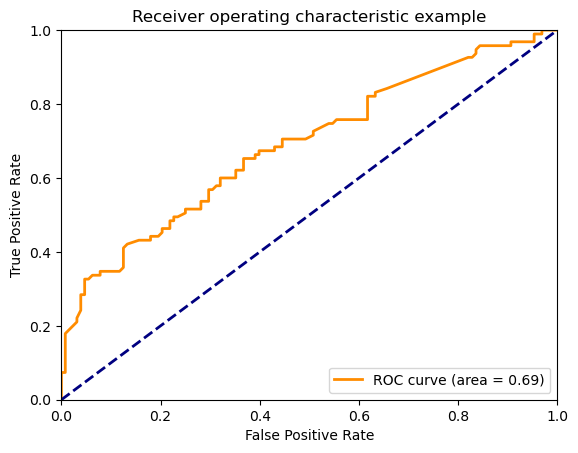

In [74]:
# ANSWER
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg_3.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()



Can we improve the model by including the remaining features?

In [ ]:
# ANSWER



In [75]:
# Set Feature Both Numerical, Categorical

feature_cols_4 = ['Parch', 'Pclass_1', 'Pclass_2', 'Age','SibSp','Fare','Sex_female', 'Sex_male',
                  'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Pclass_3']
target_cols  = 'Survived'


In [76]:
X = titanic_with_dummies[feature_cols_4]
y = titanic_with_dummies[target_cols]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
logreg_4 = LogisticRegression()
    
logreg_4.fit(X_train, y_train)
    
logreg_score_4 = logreg_4.score(X_test, y_test)

C:\Users\Sanjeshni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
y_pred_class = logreg_4.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[113  15]
 [ 29  66]]


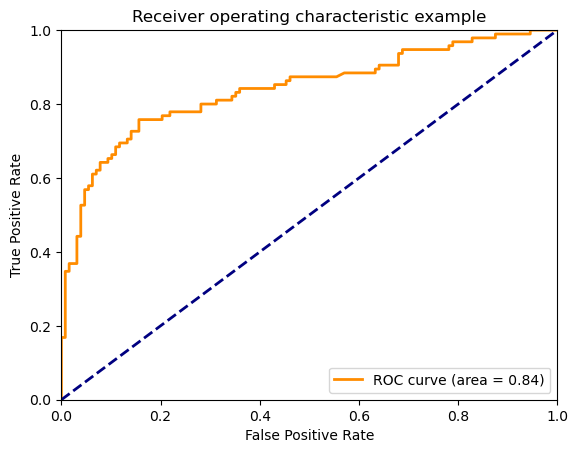

In [79]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg_4.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?


In [80]:
feature_cols_5 = ['Parch', 'Pclass_1', 'Pclass_2', 'Age','SibSp','Fare','Sex_female', 'Sex_male',
                  'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Pclass_3']
target_cols  = 'Survived'

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
logreg_5 = LogisticRegression()
    
logreg_5.fit(X_train, y_train)
    
logreg_score_5 = logreg_5.score(X_test, y_test)

C:\Users\Sanjeshni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
y_pred_class = logreg_5.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[109  21]
 [ 25  68]]


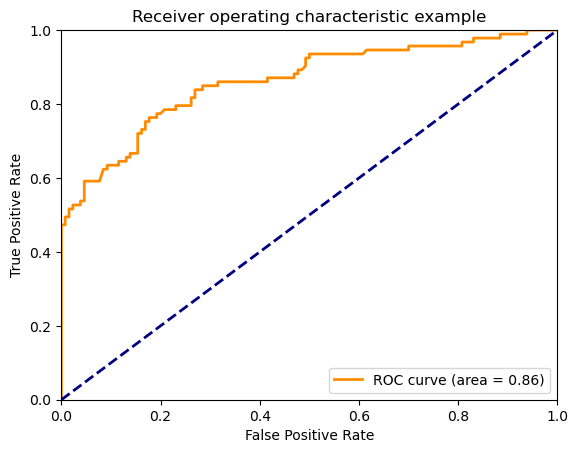

In [85]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg_5.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
## the score has increased while using all other features

## 2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

In [89]:
feature_cols_5 = ['Parch', 'Pclass_1', 'Pclass_2', 'Age','SibSp','Fare','Sex_female', 'Sex_male',
                  'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Pclass_3']
target_cols  = 'Survived'

logreg_5 = LogisticRegression

scores = cross_val_score(logreg, titanic_with_dummies[feature_cols_5], titanic_with_dummies[target_cols], cv=5)
scores.mean()


C:\Users\Sanjeshni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sanjeshni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

0.7923859142552256

## 3. Look at the `fpr` & `tpr` vectors for the best model.

In [ ]:
logreg_6 = LogisticRegression




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



